<h1>Image segmentation with k-NN</h1>

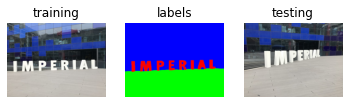

In [12]:
import cv2; #import OpenCV – computer vision functions
import numpy as np; #handle arrays/matrices
import matplotlib.pyplot as plt; #for plotting graphs and showing images
import random;
import math;
k=7; #k= 7
orgimg=cv2.imread('pyramid2.jpeg')#training image
img=cv2.cvtColor(orgimg,cv2.COLOR_BGR2RGB);
orgimg_label=cv2.imread('pyramid2_label.jpeg')#training labels
img_label=cv2.cvtColor(orgimg_label,cv2.COLOR_BGR2RGB);
org_test_img=cv2.imread('pyramid1.jpeg')#test image
img_test=cv2.cvtColor(org_test_img,cv2.COLOR_BGR2RGB);
plt.subplot(131);plt.imshow(img);plt.title('training');plt.axis('off')
plt.subplot(132);plt.imshow(img_label);plt.title('labels');plt.axis('off');
plt.subplot(133);plt.imshow(img_test);plt.title('testing');plt.axis('off');
plt.show()

In [13]:
#load the training data
width=img.shape[1];height=img.shape[0];
No_training_samples=100;
training_data=np.zeros([No_training_samples,3]);
training_label=np.zeros(No_training_samples);
for i in range(No_training_samples):
    rx=int(random.random()*width);
    ry=int(random.random()*height);
    training_data[i]=img[ry,rx];
    training_label[i]=0;
    if (img_label[ry,rx,0]>200): training_label[i]=0;
    elif(img_label[ry,rx,1]>200):training_label[i]=1;
    else:training_label[i]=2;

In [14]:
def distance(v1, v2):#Euclidean distance between 2 vectors 
    dist=0.0;
    for i in range(len(v1)):
        dist += ((v1[i] - v2[i])**2);
    return math.sqrt(dist);
def firstvariable(listitem):
    return listitem[0];#sort the list based on the 1st variable
def find_nearest_k(training,label,no_training,testdata,k,no_classes):
    distlist = list();
    for i in range(no_training):
        dist=distance(testdata,training[i]);
        distlist.append([dist,label[i]]);#add both the dist and the label
    distlist.sort(key=firstvariable);#sort the distance list
    classvote=np.zeros(no_classes);
    for i in range(k):       #find the k-nearest neigbhours
        classvote[int(distlist[i][1])]+=1;#get the votes for each class
    #find the class with the majority of votes
    maxclass=-99999; result=0;
    for i in range(no_classes):
        if (classvote[i]>maxclass):
            maxclass=classvote[i];
            result=i;
    return result;

In [16]:
def kNNSegmentation():#segment the image based on k-NN algorithm
    resultimg=img_test.copy();
    for y in range(height):
        for x in range(width):
            label=find_nearest_k(training_data,training_label,No_training_samples,img_test[y,x],k,3);
            if (label==0):
                resultimg[y,x,0]=255;resultimg[y,x,1]=0;resultimg[y,x,2]=0;
            elif (label==1):
                resultimg[y,x,1]=255;resultimg[y,x,0]=0;resultimg[y,x,2]=0;
            else: resultimg[y,x,2]=255;resultimg[y,x,1]=0;resultimg[y,x,0]=0;
    return resultimg;


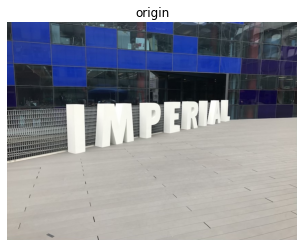

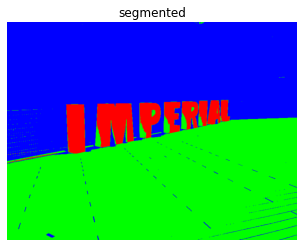

In [17]:
resultimg=kNNSegmentation();
plt.imshow(img_test);plt.title('origin');plt.axis('off');plt.show();
plt.imshow(resultimg);plt.title('segmented');plt.axis('off');plt.show()        